In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#
from dhnnlib import *

In [35]:
N = 5000
df = pd.read_csv('ph_cleaned.csv', delimiter='\t', header=0)
dfa = df.to_numpy()
Mv = df['#'].to_numpy()
Av = df['sum(x)'].to_numpy()
Av = df['sum(x²)'].to_numpy()
Tv = np.sort(df['T'].unique())
Kv = np.sort(df['K'].unique())
#
print(df)

        #      T     K  sum(x)  sum(x²)
0     500  0.333  1010   13.90    194.0
1     500  0.333   101    4.01     16.2
2     500  0.333  1061   14.20    203.0
3     500  0.333  1111   14.50    213.0
4     500  0.333  1162   14.90    224.0
...   ...    ...   ...     ...      ...
5129  500  3.300   758   20.20    406.0
5130  500  3.300   808   20.80    434.0
5131  500  3.300   859   21.50    464.0
5132  500  3.300   909   22.20    492.0
5133  500  3.300   960   22.80    520.0

[5134 rows x 5 columns]


In [44]:
xidx = np.empty(len(dfa), object)
yidx = np.empty(len(dfa), object)
avg = np.empty((len(xidx), len(yidx)), object)
var = np.empty((len(xidx), len(yidx)), object)
for iT, T in enumerate(Tv):
    indx = np.where(dfa[:,1] == T)[0]
    xidx[indx] = iT
for iK, K in enumerate(Kv):
    indx = np.where(dfa[:,2] == K)[0]
    yidx[indx] = iK
if not (None in xidx or None in yidx): print("ok")

ok


In [45]:
for i, xi in enumerate(xidx):
    for yi in yidx:
        avg[xi, yi] = Av[i]
        var[xi, yi] = Av[i]

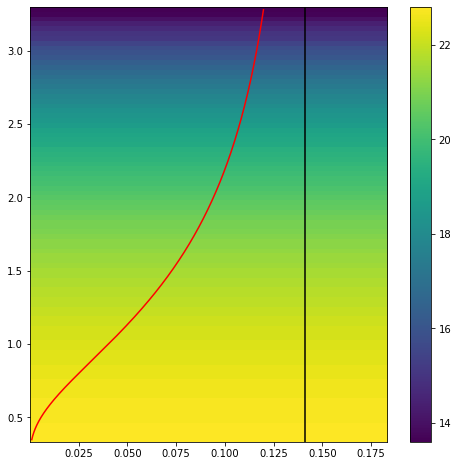

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))

x = np.linspace(1e-3, αcStiefvater*.85, num=2000, endpoint=False)
imsh = ax.imshow(avg.astype(float)[:len(Tv), :len(Kv)], 
          extent=(np.amin(Kv)/N, np.amax(Kv)/N, 
                  np.amin(Tv), np.amax(Tv)),
          interpolation=None, aspect = 'auto')
ax.plot(x, 1./βcH2(x), 'red')
ax.axvline(αcStiefvater, c='black')
clb = fig.colorbar(imsh)
# imsh.set_clim(None, None)
ax.set_xlim(np.amin(Kv)/N, αcStiefvater*1.3)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$T$")

In [ ]:


# count = 0
# for y1 in yvals:
#     indy = np.where((df.__array__()[:,1]) == y1)[0]
#     yv[indy] = count
#     count += 1
# count = 0
# for i1 in range(len(xv)):
#     i = xv[count]
#     j = yv[count]
#     z[i, j] = zvals[count]
#     count += 1





# fig, ax = plt.subplots(figsize=(8, 8))
# # yvals.shape, xvals.shape
# # # print(len(df[3]))
# # zvals = df[3].values[:-20].reshape(len(xvals), len(yvals)).T
# # # plt.tricontourf(df[2]/5000, 1/df[1], (df[3]/(df[0])),1000)
# xvals = xvals/5000
# z = z.astype(float)
# imsh = ax.imshow(z, extent=(np.amin(xvals), np.amax(xvals), np.amin(yvals), np.amax(yvals)),
#              interpolation=None, aspect = 'auto')
# # plt.clim(0,1)
# # plt.xlim(0.01,0.2)
# # # #plt.xscale('log')

# x = np.linspace(1e-4, 0.141, num=2000, endpoint=False)
# # ax.plot(x,1/βcH2(x))
# # ax.set_yscale('log')
# ax.set_xlabel(r"$\alpha$")
# ax.set_ylabel(r"$T$")
# clb = fig.colorbar(imsh)
# imsh.set_clim(0,10)
# # plt.ylim(0, 4)
# # plt.xlim(0, 0.2)